---
layout: post
title:  "Why do we need to regularize linear regression?"
short_title: "Linear Regression Regularization Explained"
desc: "Why do we regularize our linear models? When do we turn this on or off?"
long_desc: "In this article, we'll provide some useful examples of datasets highlighting how regularization works and why it is needed. Covering Lasso (L1), ridge (L2), and elastic regularization."
date: ###DATE
categories: [tutorial]
tags: [statistics]
loc: ###LOC
permalink: ###LINK 
redirect_from: "/regularization"

math: true
---

In this small write up, I'll be trying to fill a bit of a void I've seen online. That is, there are plenty of definitions of lasso, ridge, and elastic regularization, but most of them aren't accompanied by useful examples showing when these terms become critically important! To address this, we're going to look at regularization using three different use cases:

1. A perfect dataset! White noise on top of a direct linear relationship.
2. A dataset with confounding variables. Not all of our features will be useful.
3. A dataset with multicolinearity. Super high correlation in some of our features will cause issues.



# A recap on the different regularization forms.

## A normal linear model

Without regularization, a stock standard linear regression is simply going to fit a model of

$$ y = \beta X, $$

where $X$ are our features and $\beta$ an array of coefficients, one for each feature. For example, a 1D model will have $y=\beta_0 x_0$. A 2D model will have $y = \beta_0 x_0 + \beta_1 x_1$. To fit the model, we optimise our value of $\beta$ to minimise the difference between the predicted $y$ value and the observed data points $y_i$, something like this:

$$ f = \sum_i (y_i - \beta X_i), $$

where the $i$ simple represents counting over each datapoint we have.


## Ridge Regression

Ridge regression adds what regularization via adding the L2 penalty to the optimisation function. The amount of penalty is controlled by the $\lambda$ parameter.

$$ f = \sum_i (y_i - \beta X_i) + \lambda \sum \beta^2 $$

If we minimise the above function, we now want the sum of all the $\beta$ values to be as small as possible, with a quadratic pull. 


## Lasso Regression

Lasso Regression adds a penalty just like ridge regression, but we add whats now called the L1 penalty. Again, the amount is controlled by $\lambda$.

$$ f = \sum_i (y_i - \beta X_i) + \lambda \sum |\beta| $$

Using an absolute value instead of the square from ridge means that Lasso regression can and will pull $\beta$ terms all the way to zero if they aren't adding to the model.

*To easily remember, Lasso is linear (L1). Ridge is a "runaway" quadratic (L2 like $L^2$).*

## ElasticNet

This is the easiest of all. Add both terms. Control the values of the two $\lambda$s to tweak behaviour.

$$ f = \sum_i (y_i - \beta X_i) + \lambda_1 \sum |\beta| + \lambda_2 \sum \beta^2 $$




# What does regularization do on perfect data?

To investigate this, we're going to run a few different models in each of the sections. They are all from the amazing `scikit-learn` library too: `LinearRegression` (no regularization), `Lasso`, `Ridge` and `ElasticNet`.

But first, let's not get ahead of ourselves. Let's make some nice data with a super simple gradient of one. Yup, the simplest linear model possible.

In [2]:
# Remove
from base import *
import numpy as np
np.random.seed(3)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['axes.prop_cycle'] = (
    cycler(color=['#de8b07', '#d1180a', '#aa2cd4', '#449aeb', '#821d0d']) + 
    cycler(linestyle=['-', '--', ':', '-.', '-']))

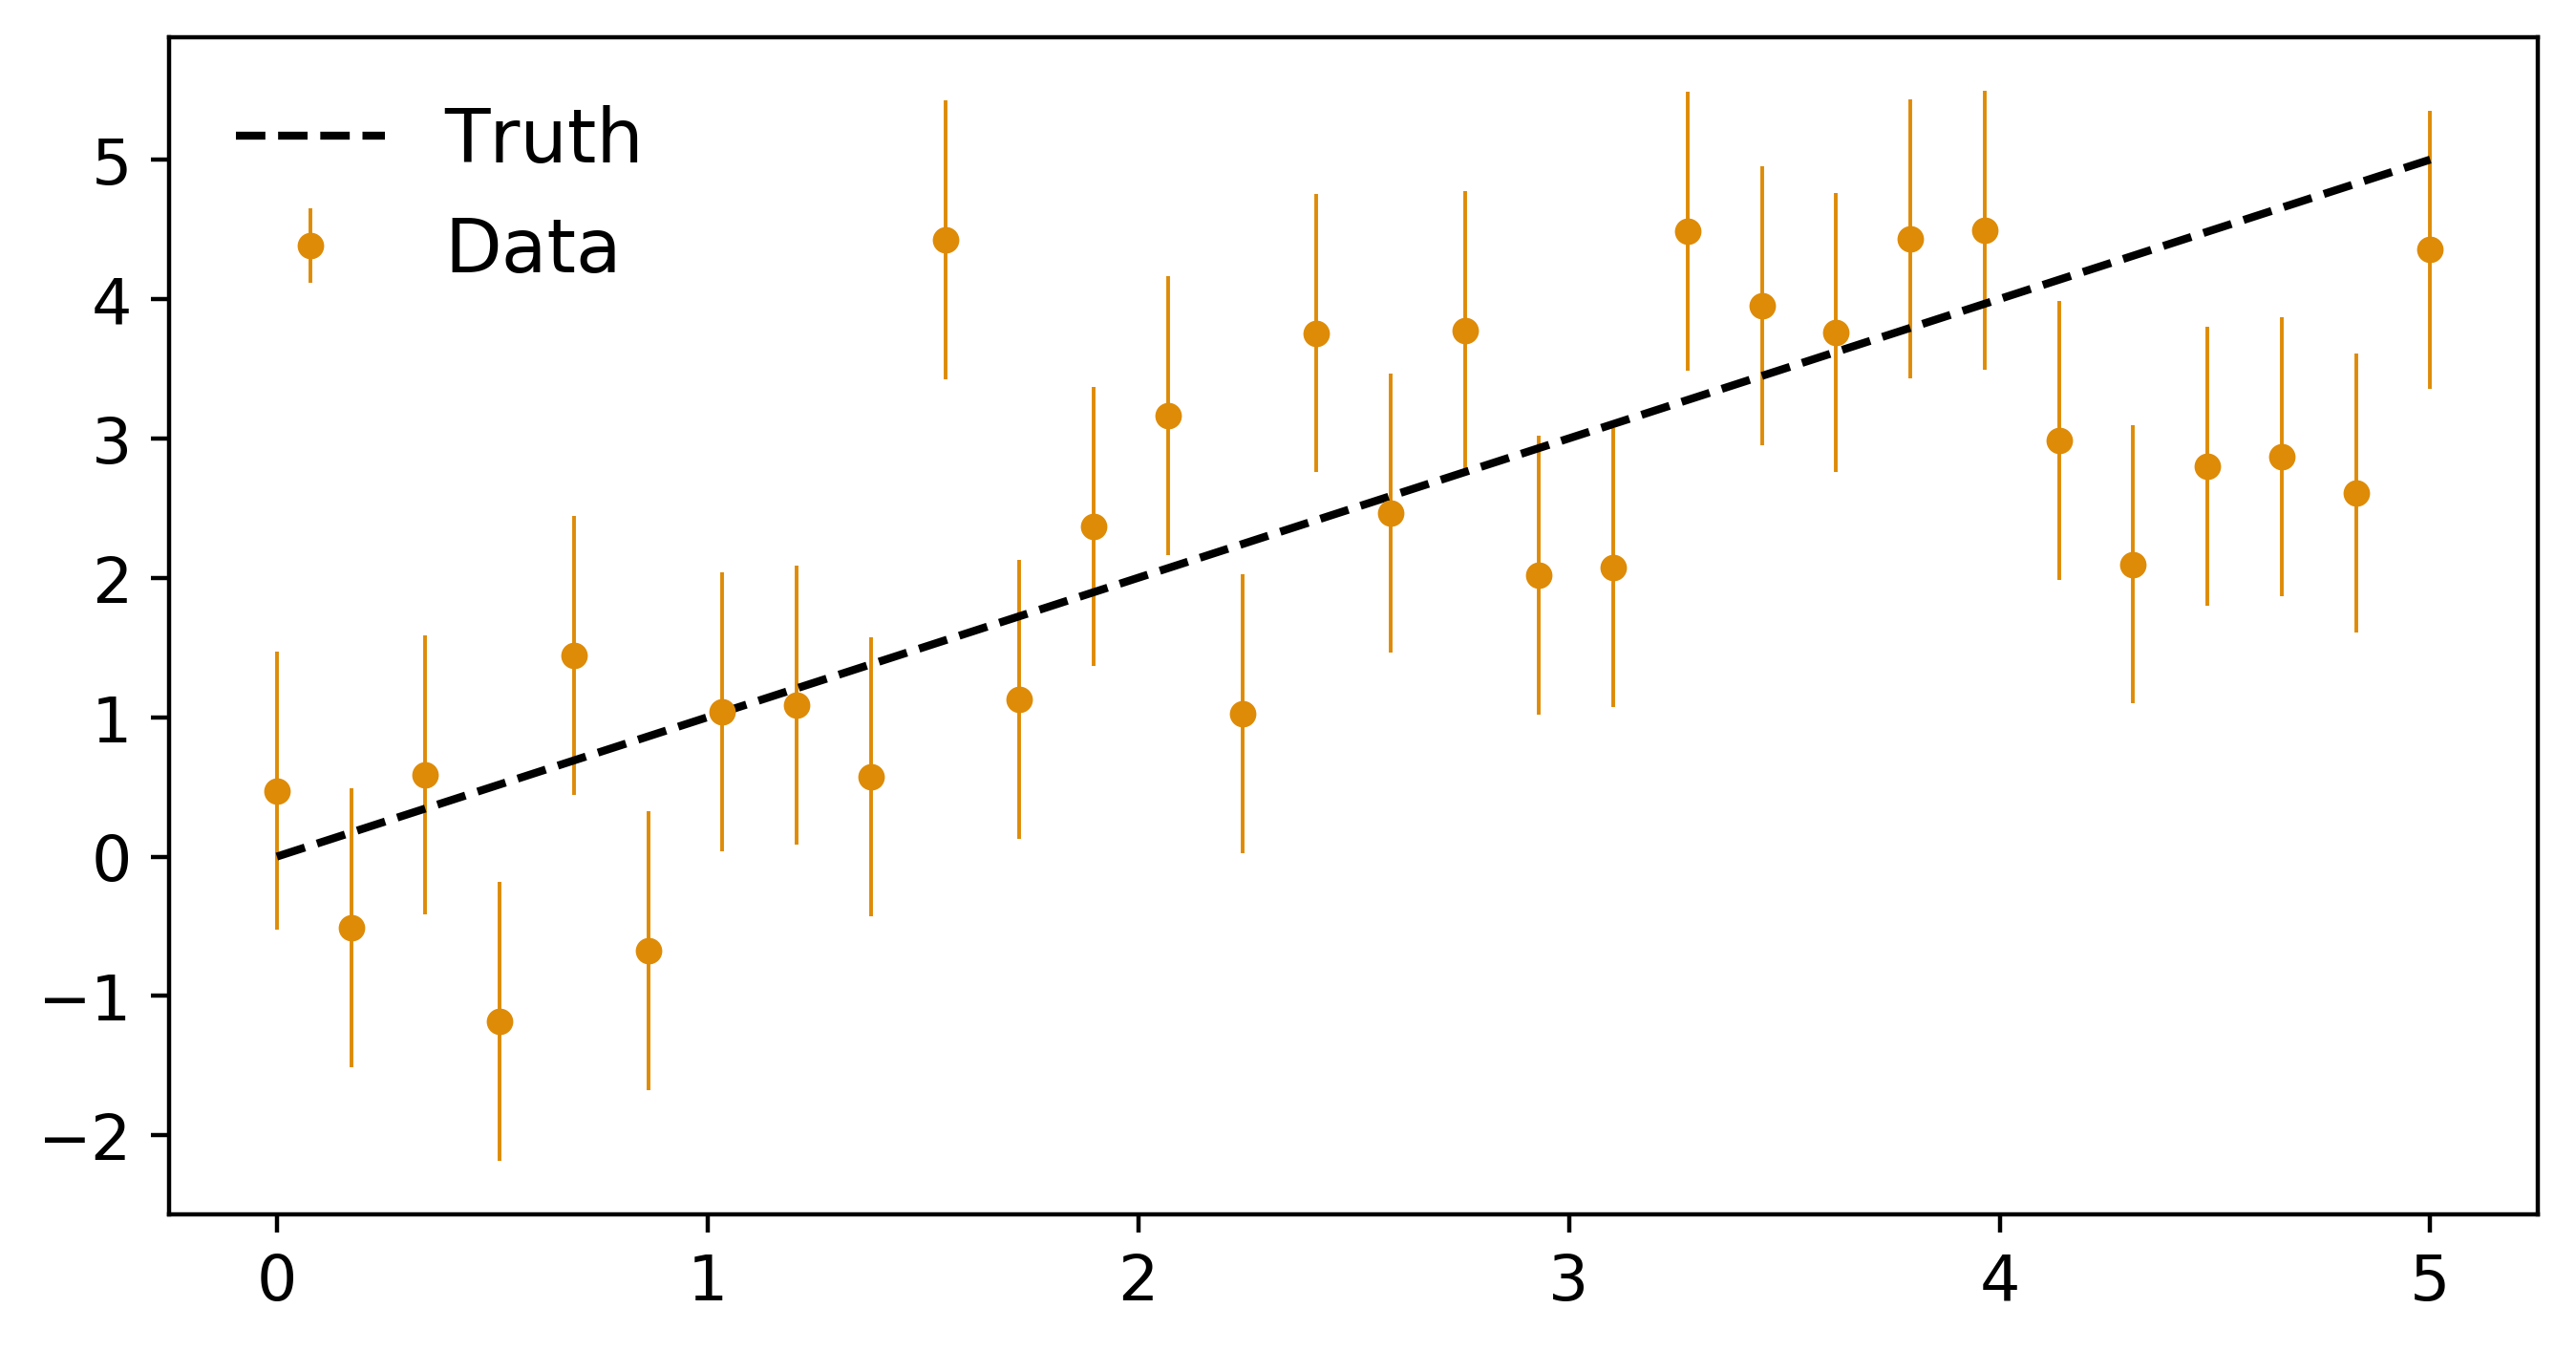

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(12)
n = 30

xs = np.linspace(0, 5, n)
es = np.ones(n)
ys = xs + es * norm.rvs(size=n)

xs = np.atleast_2d(xs).T # As sklearn expects a 2D feature list

plt.errorbar(xs, ys, yerr=es, fmt="o", label="Data", lw=0.7)
plt.plot([0, 5], [0, 5], label="Truth", c="k")
plt.legend();

Okay, so lets run our models over it now!

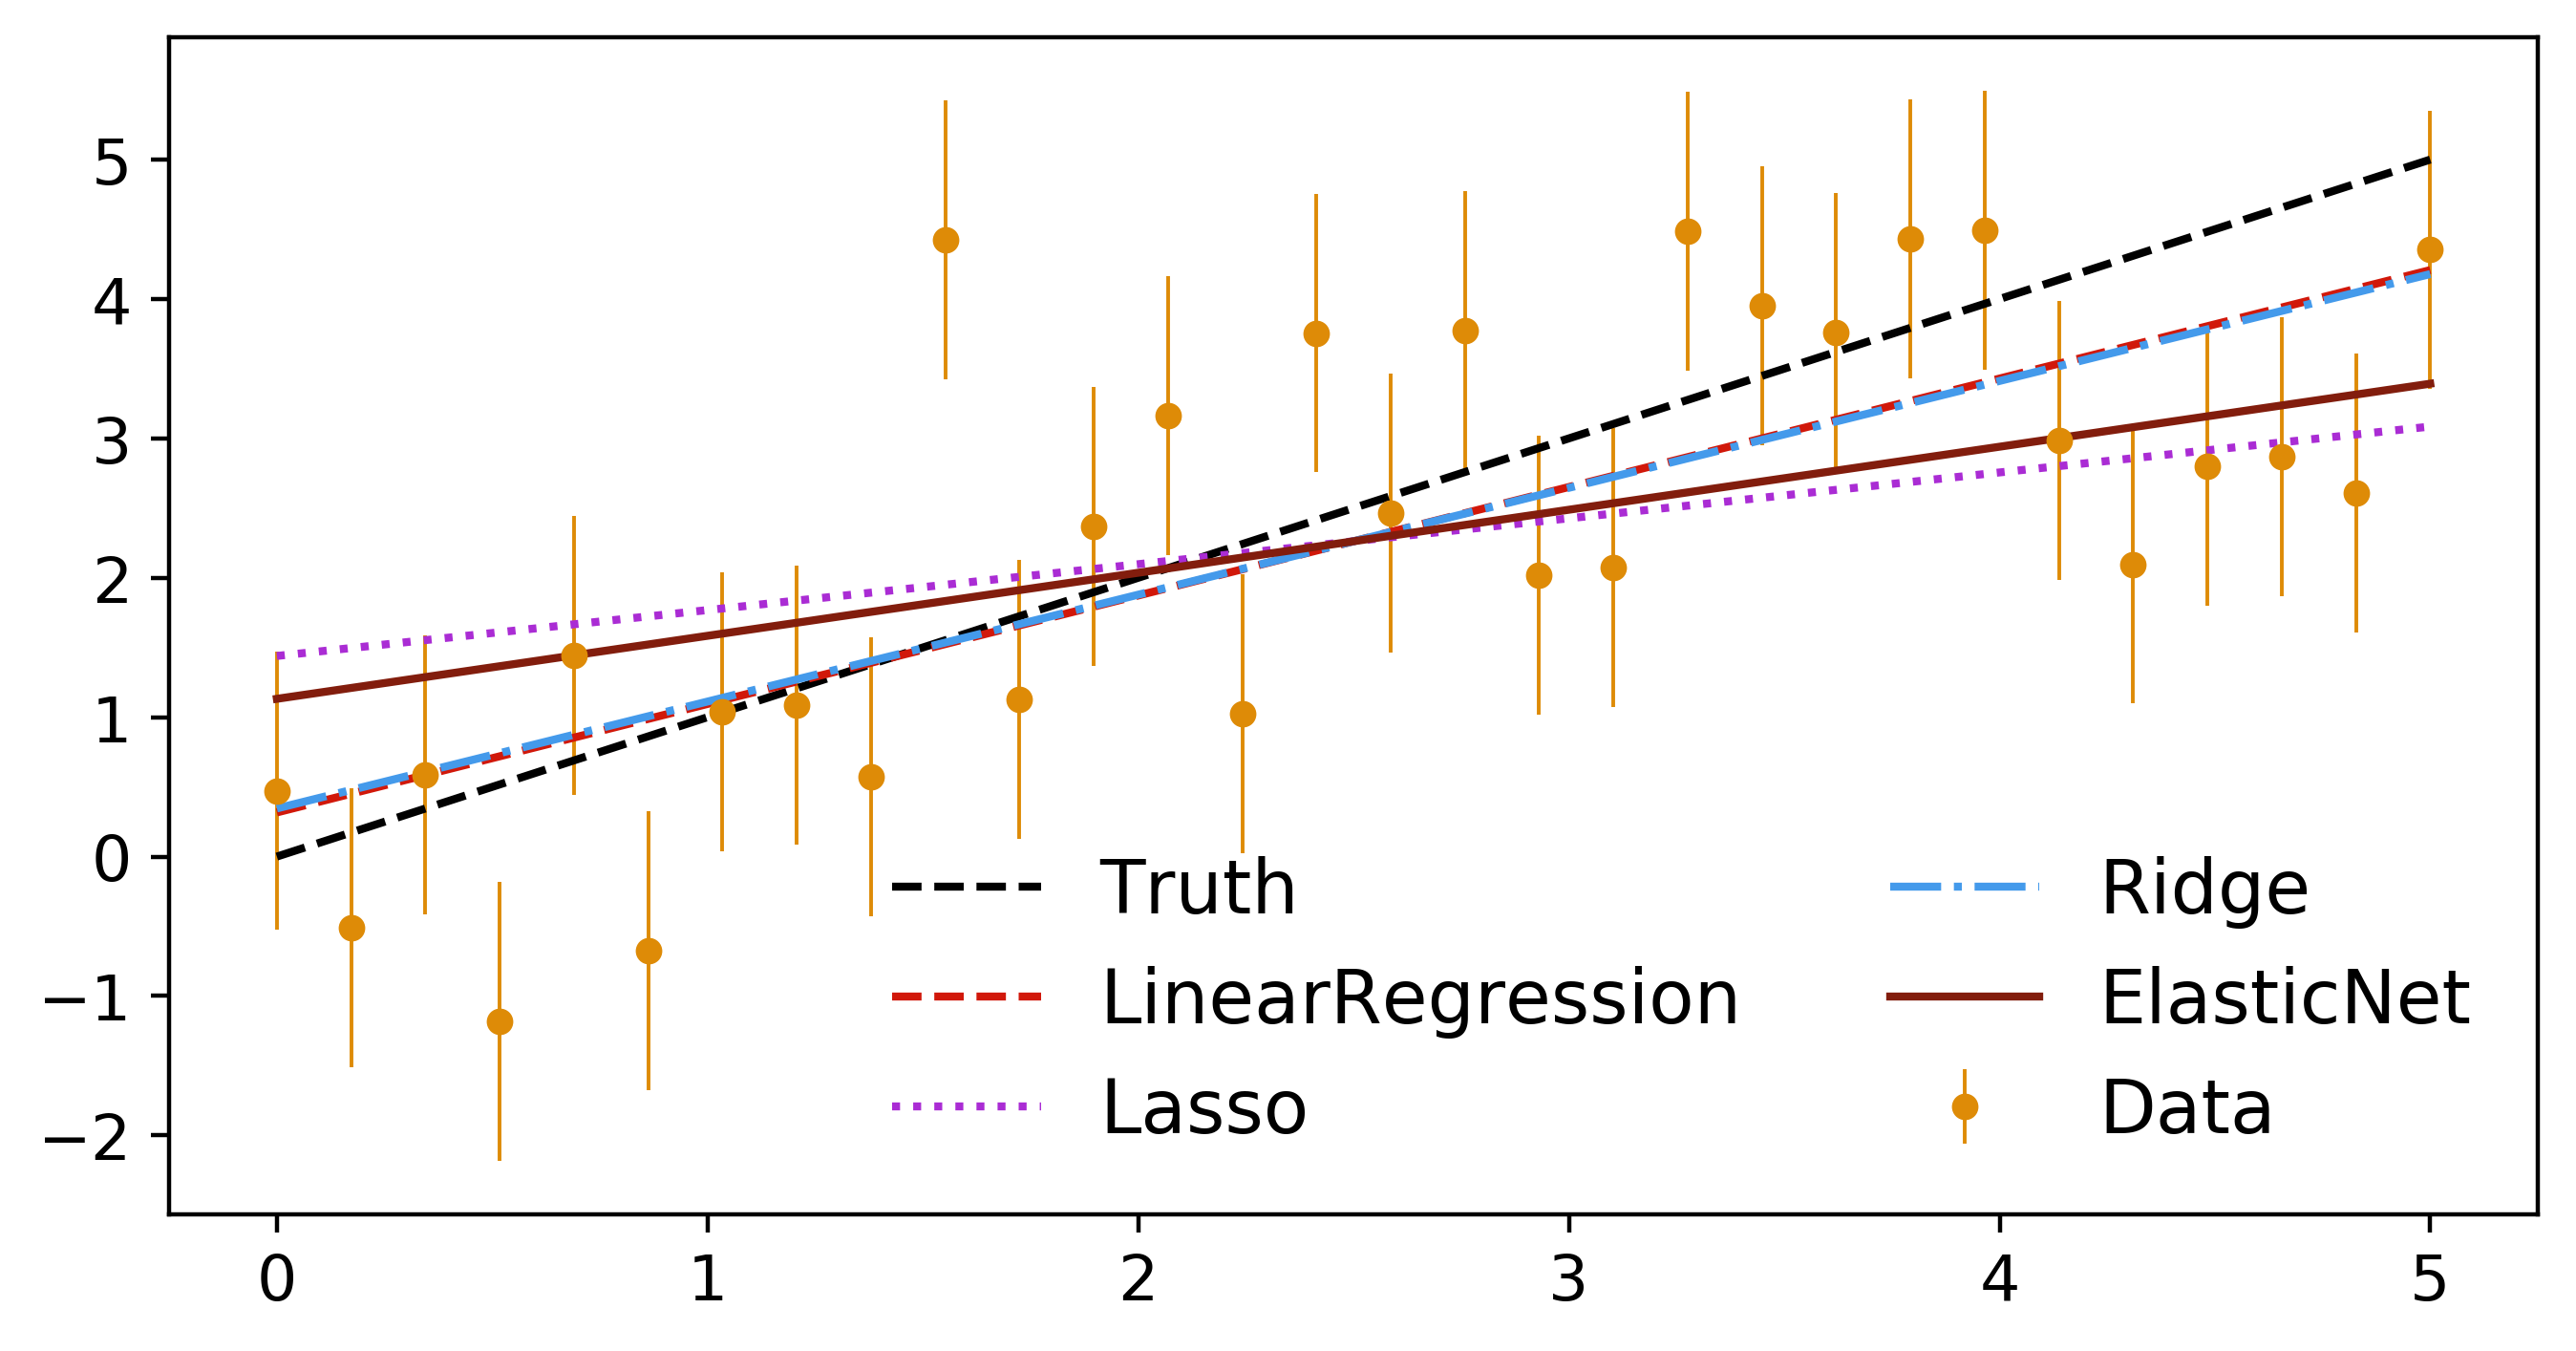

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

plt.errorbar(xs, ys, yerr=es, fmt="o", label="Data", lw=0.7)
plt.plot([0, 5], [0, 5], label="Truth", c="k", ls="--")

for m in [LinearRegression(), Lasso(), Ridge(), ElasticNet()]:
    m.fit(xs, ys)
    plt.plot(xs, m.predict(xs), label=m.__class__.__name__)
plt.legend(ncol=2);

Unsurprisingly, with our perfect data, it seems like the regularization isn't helping us at all. But we can clearly see the impact of the penalties bringing our singular $
\beta$ value down.

# Regularization on confounded data

No more simple models for us now, lets preserve a nice simple relationship, but add in a bunch of useless variables. Here we'll mostly use the first feature, a hint of the second, and none of the other eight!

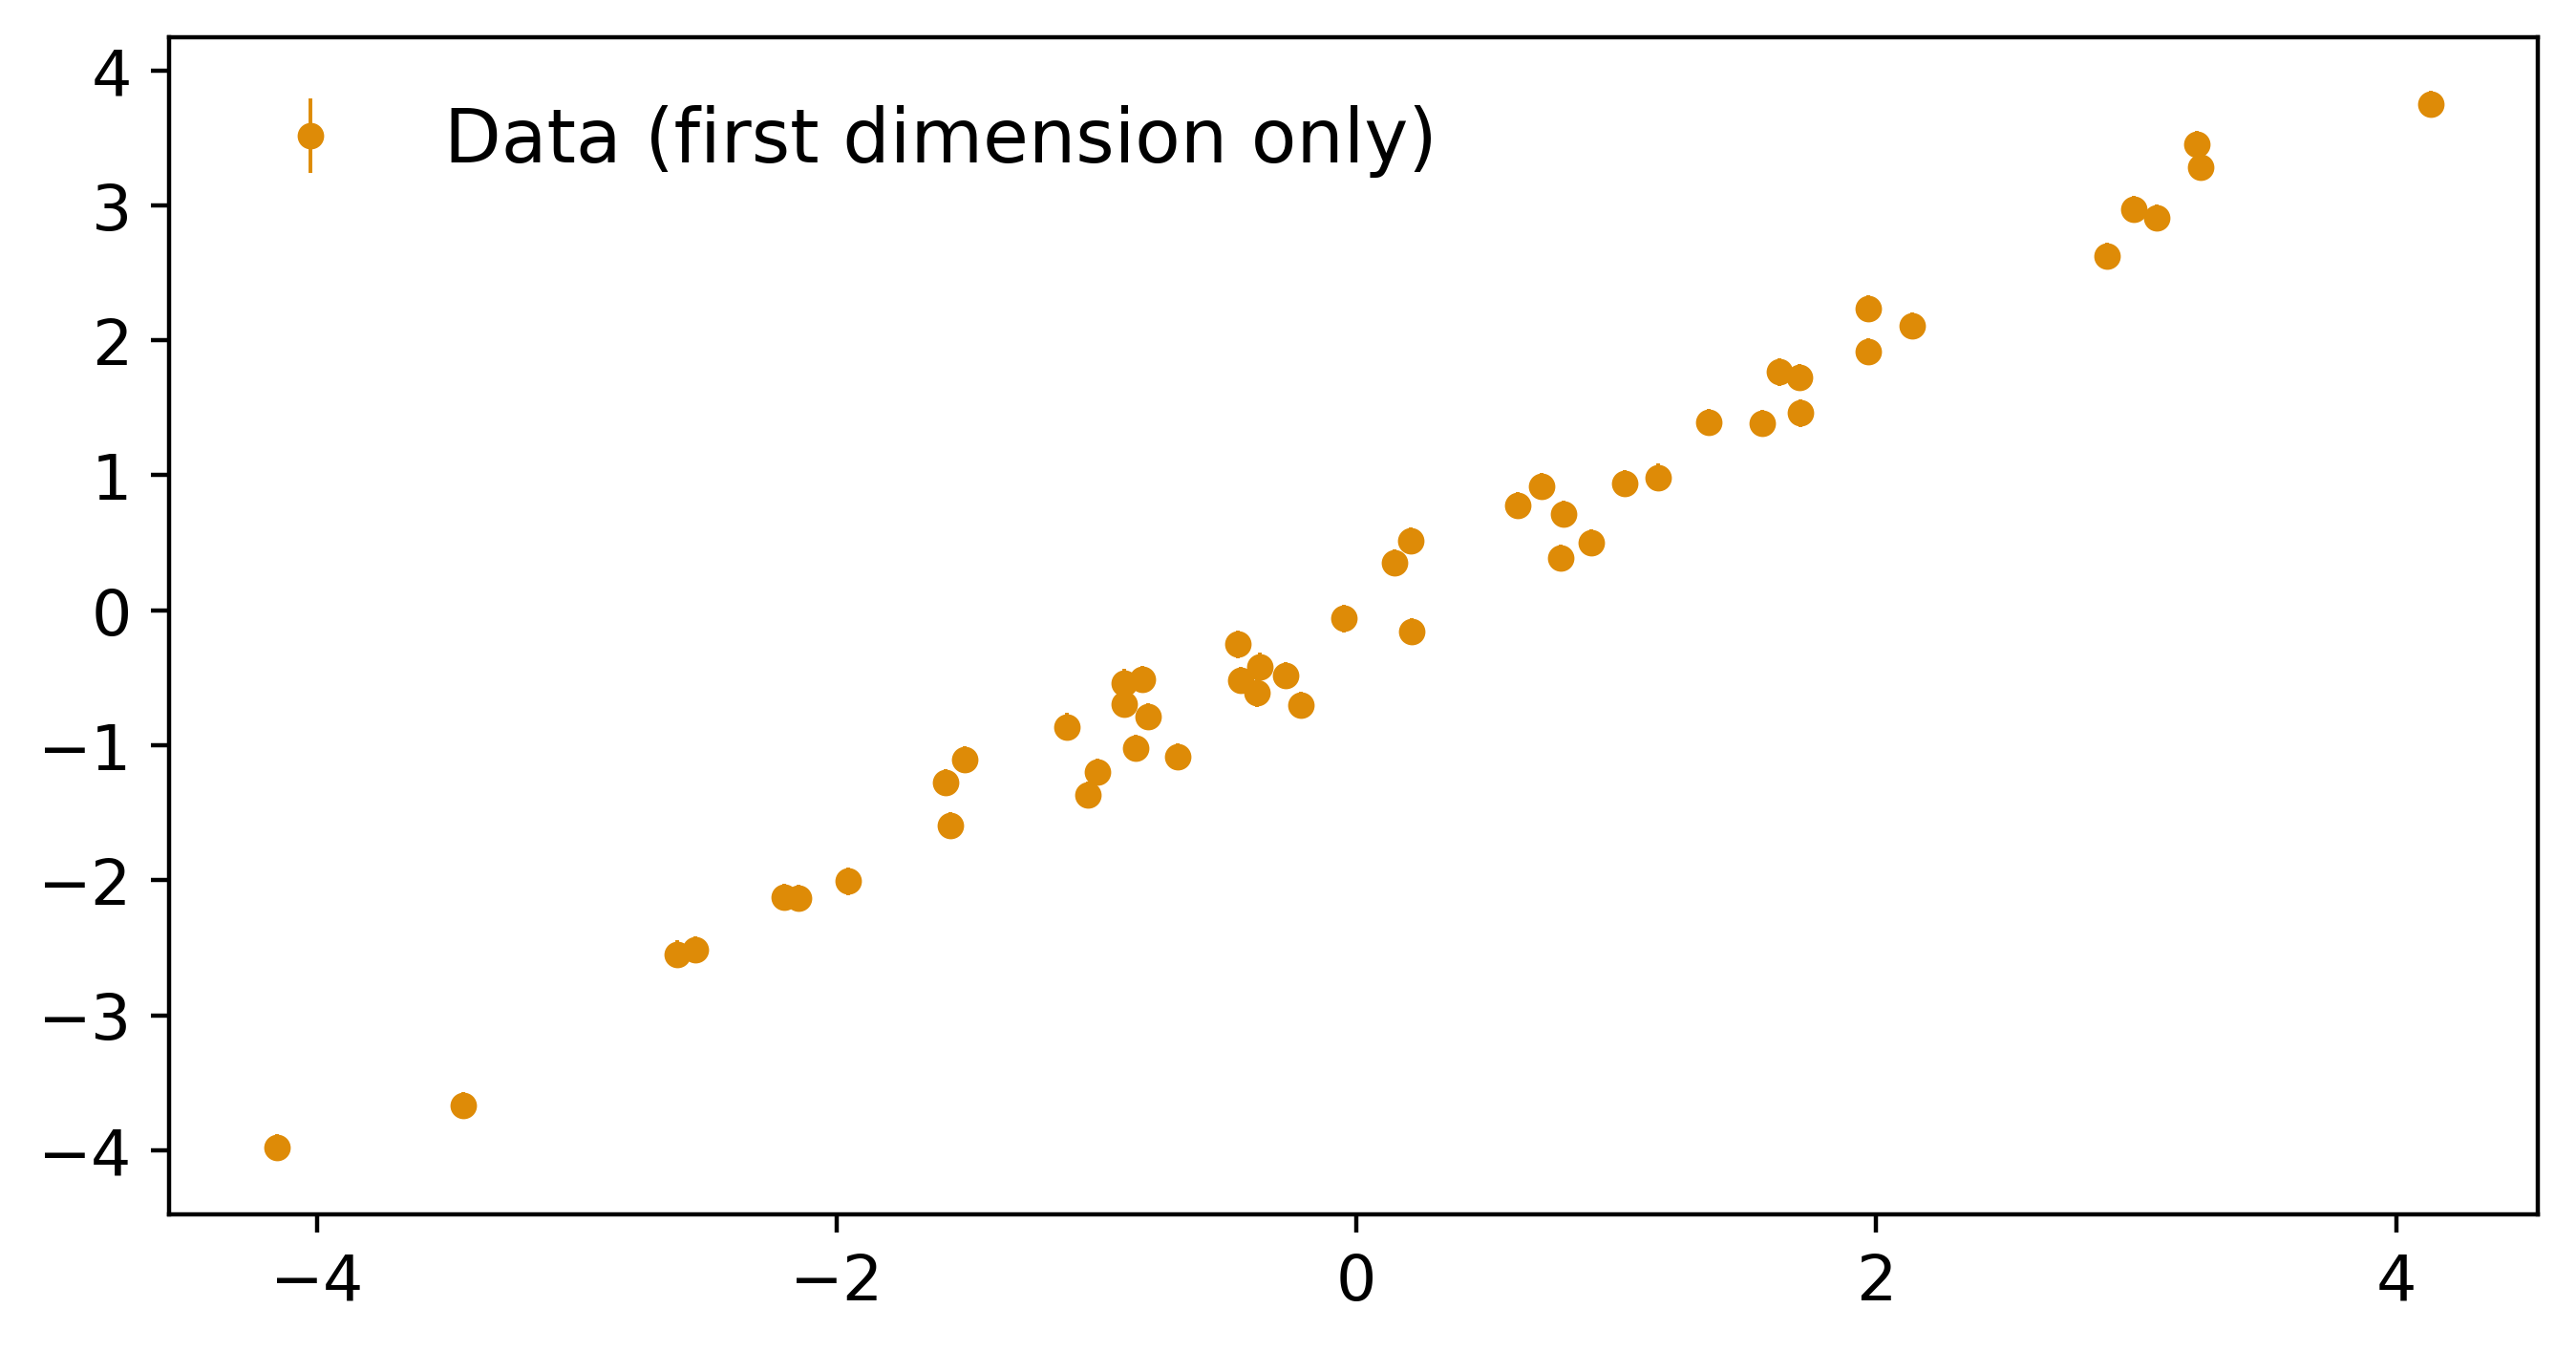

In [6]:
# 50 observations of 20 features, assuming 0.1 uncertainty on observations
np.random.seed(1)
xs = norm.rvs(scale=2, size=(50, 20))
xs = xs[xs[:, 0].argsort()] # Sort array by first dimension for easier plotting
es = 0.1 * np.ones(shape=50)
ys = 1 * xs[:, 0] + 0.1 * xs[:, 1] + es * norm.rvs(size=es.shape)

plt.errorbar(xs[:, 0], ys, yerr=es, fmt="o", lw=0.7, label="Data (first dimension only)")
plt.legend();

So lets fit some more models, and note that even though X is now 20-dimensional, because plotting is hard, Im just going to show $X_0$ primarily, just like above.

In [7]:
plt.rcParams['lines.markersize'] = 2

Lets now fit this, just like before, but making sure to save out the vaue of the coefficients so that we can see how the different models are treating their $\beta$ values.

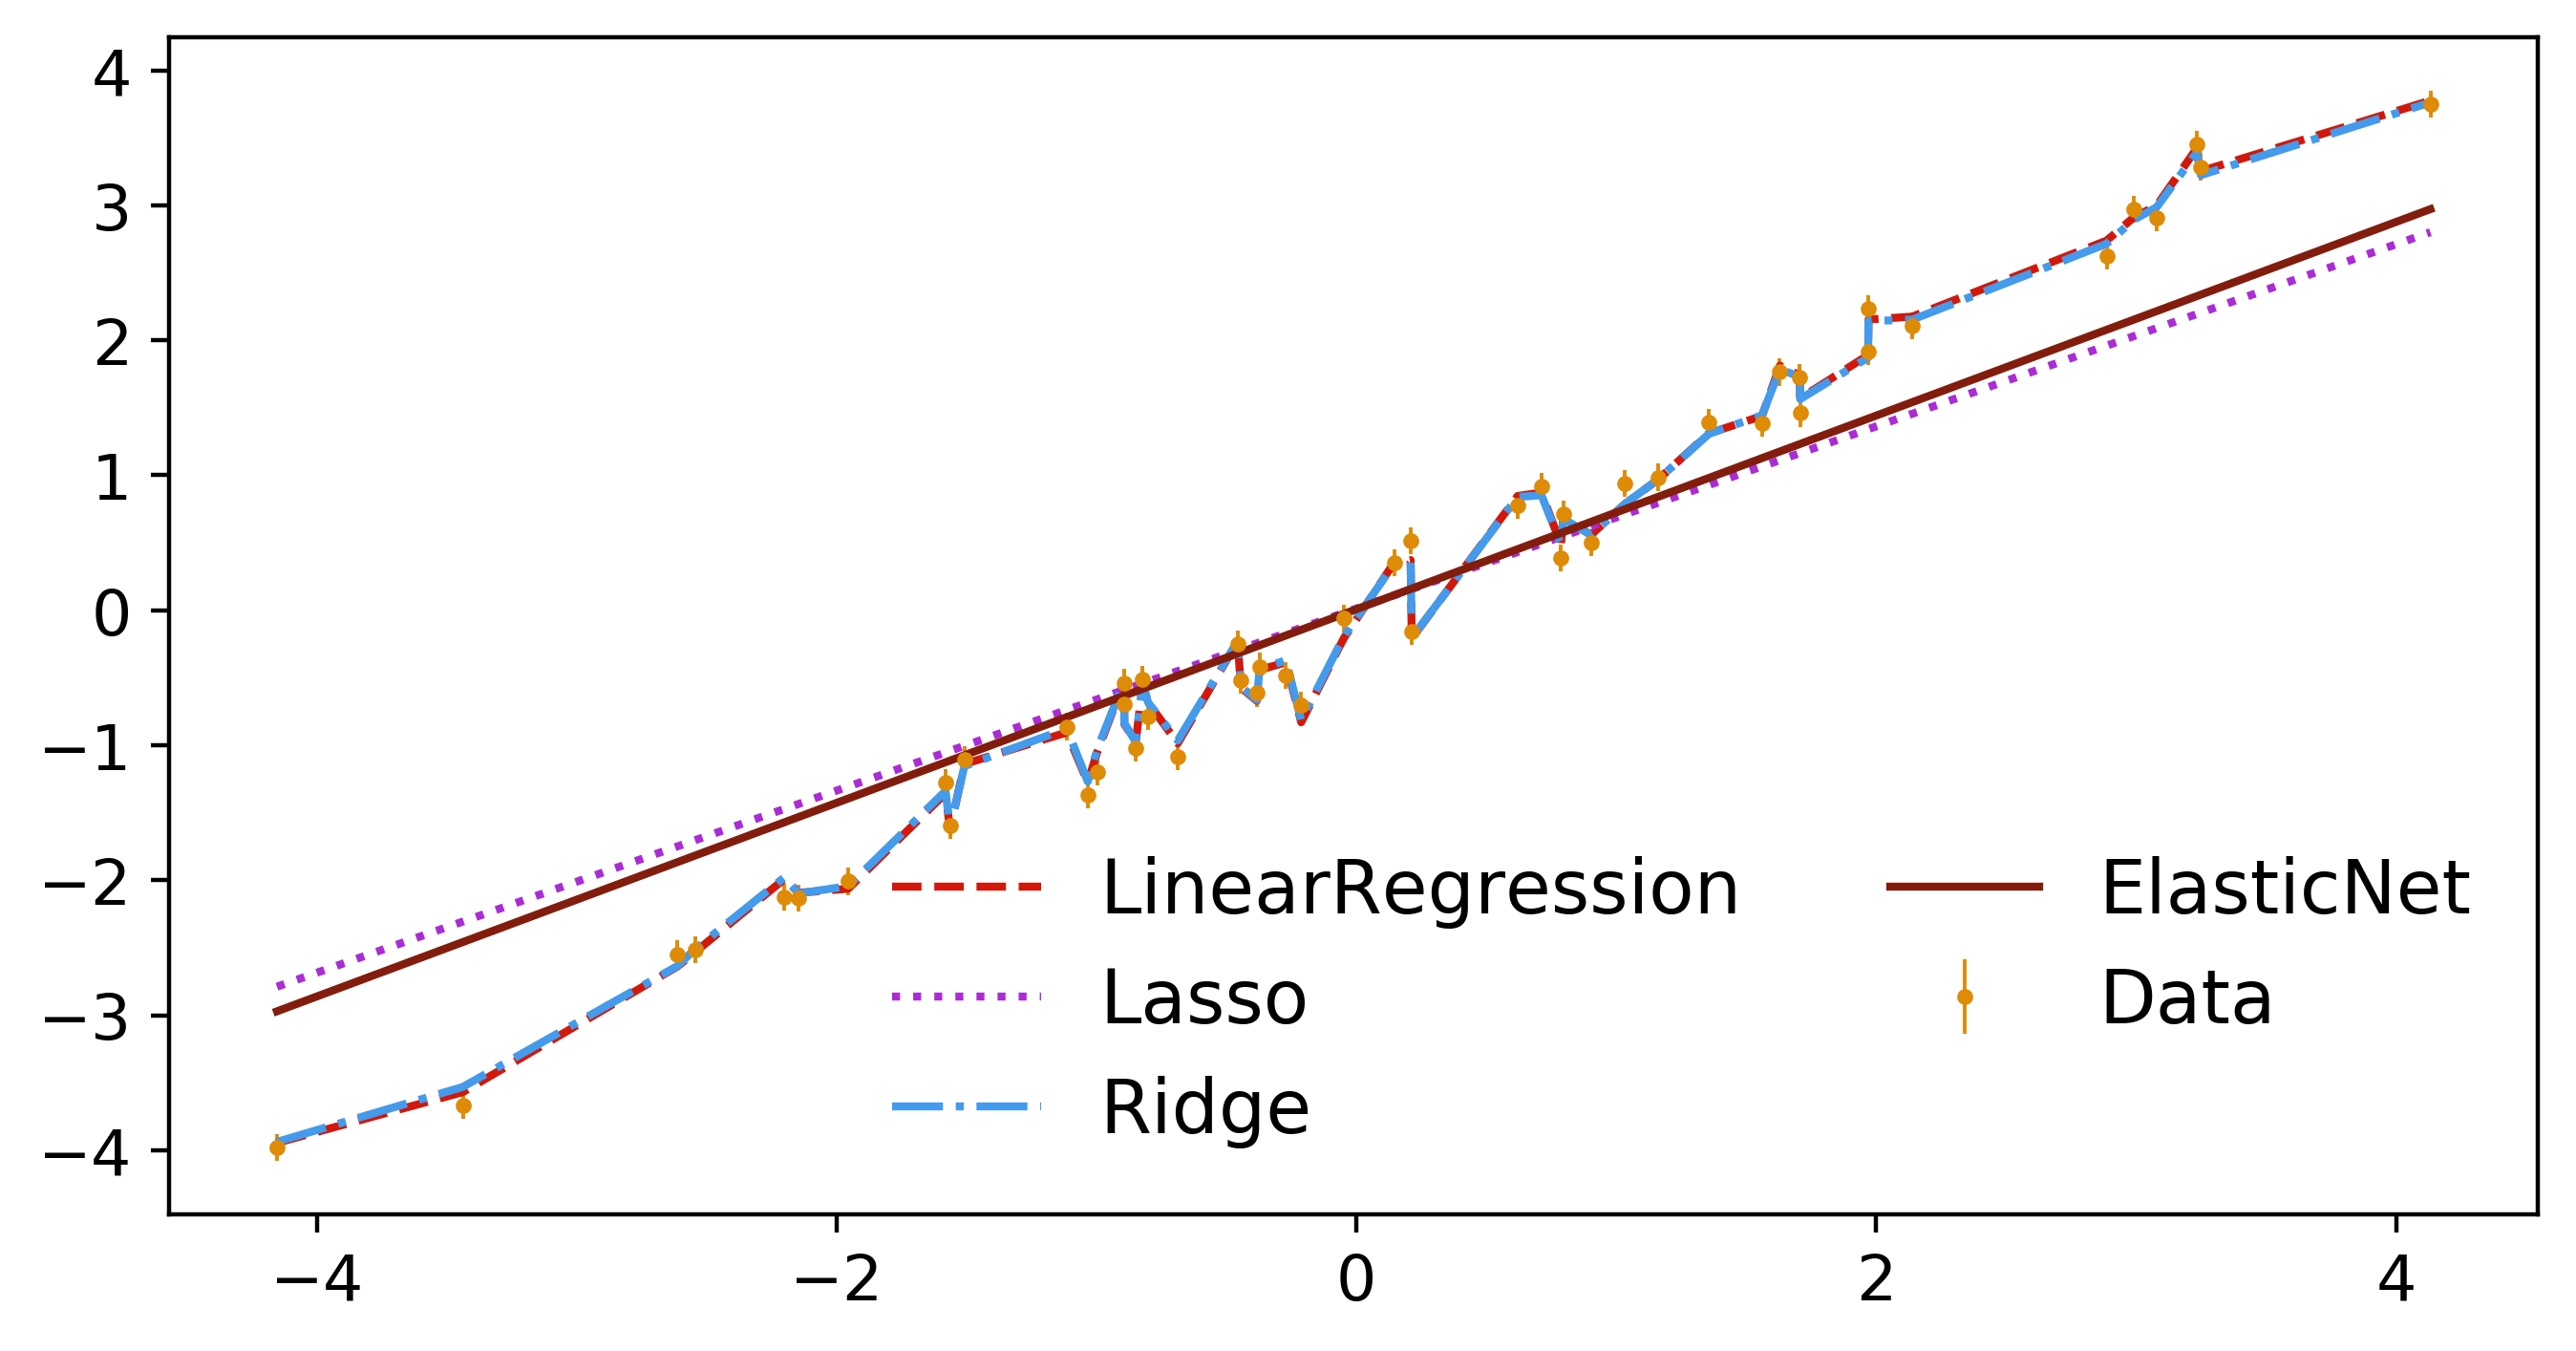

In [8]:
plt.errorbar(xs[:, 0], ys, yerr=es, fmt="o", lw=0.7, label="Data");

beta_dict = {}
for m in [LinearRegression(), Lasso(), Ridge(), ElasticNet()]:
    m.fit(xs, ys)
    predict = m.predict(xs)
    name = m.__class__.__name__
    beta_dict[name] = m.coef_
    plt.plot(xs[:, 0], predict, label=name)
plt.legend(ncol=2);

Another busy plot, but the take away here is that the models with regularization, are in general, *smoother* than the other models. That is, they are less prone to overfitting. You can see, for example, the ElasticNet and Lasso regularization models (with the two strongest penalties) show that the model that comes out at the end is essentially only dependent on our first feature (hence the straight line), with other smaller effects marginalised in the model fitting. 

I saved the coefficient values out into `beta_dict` so we can see this plotted now:

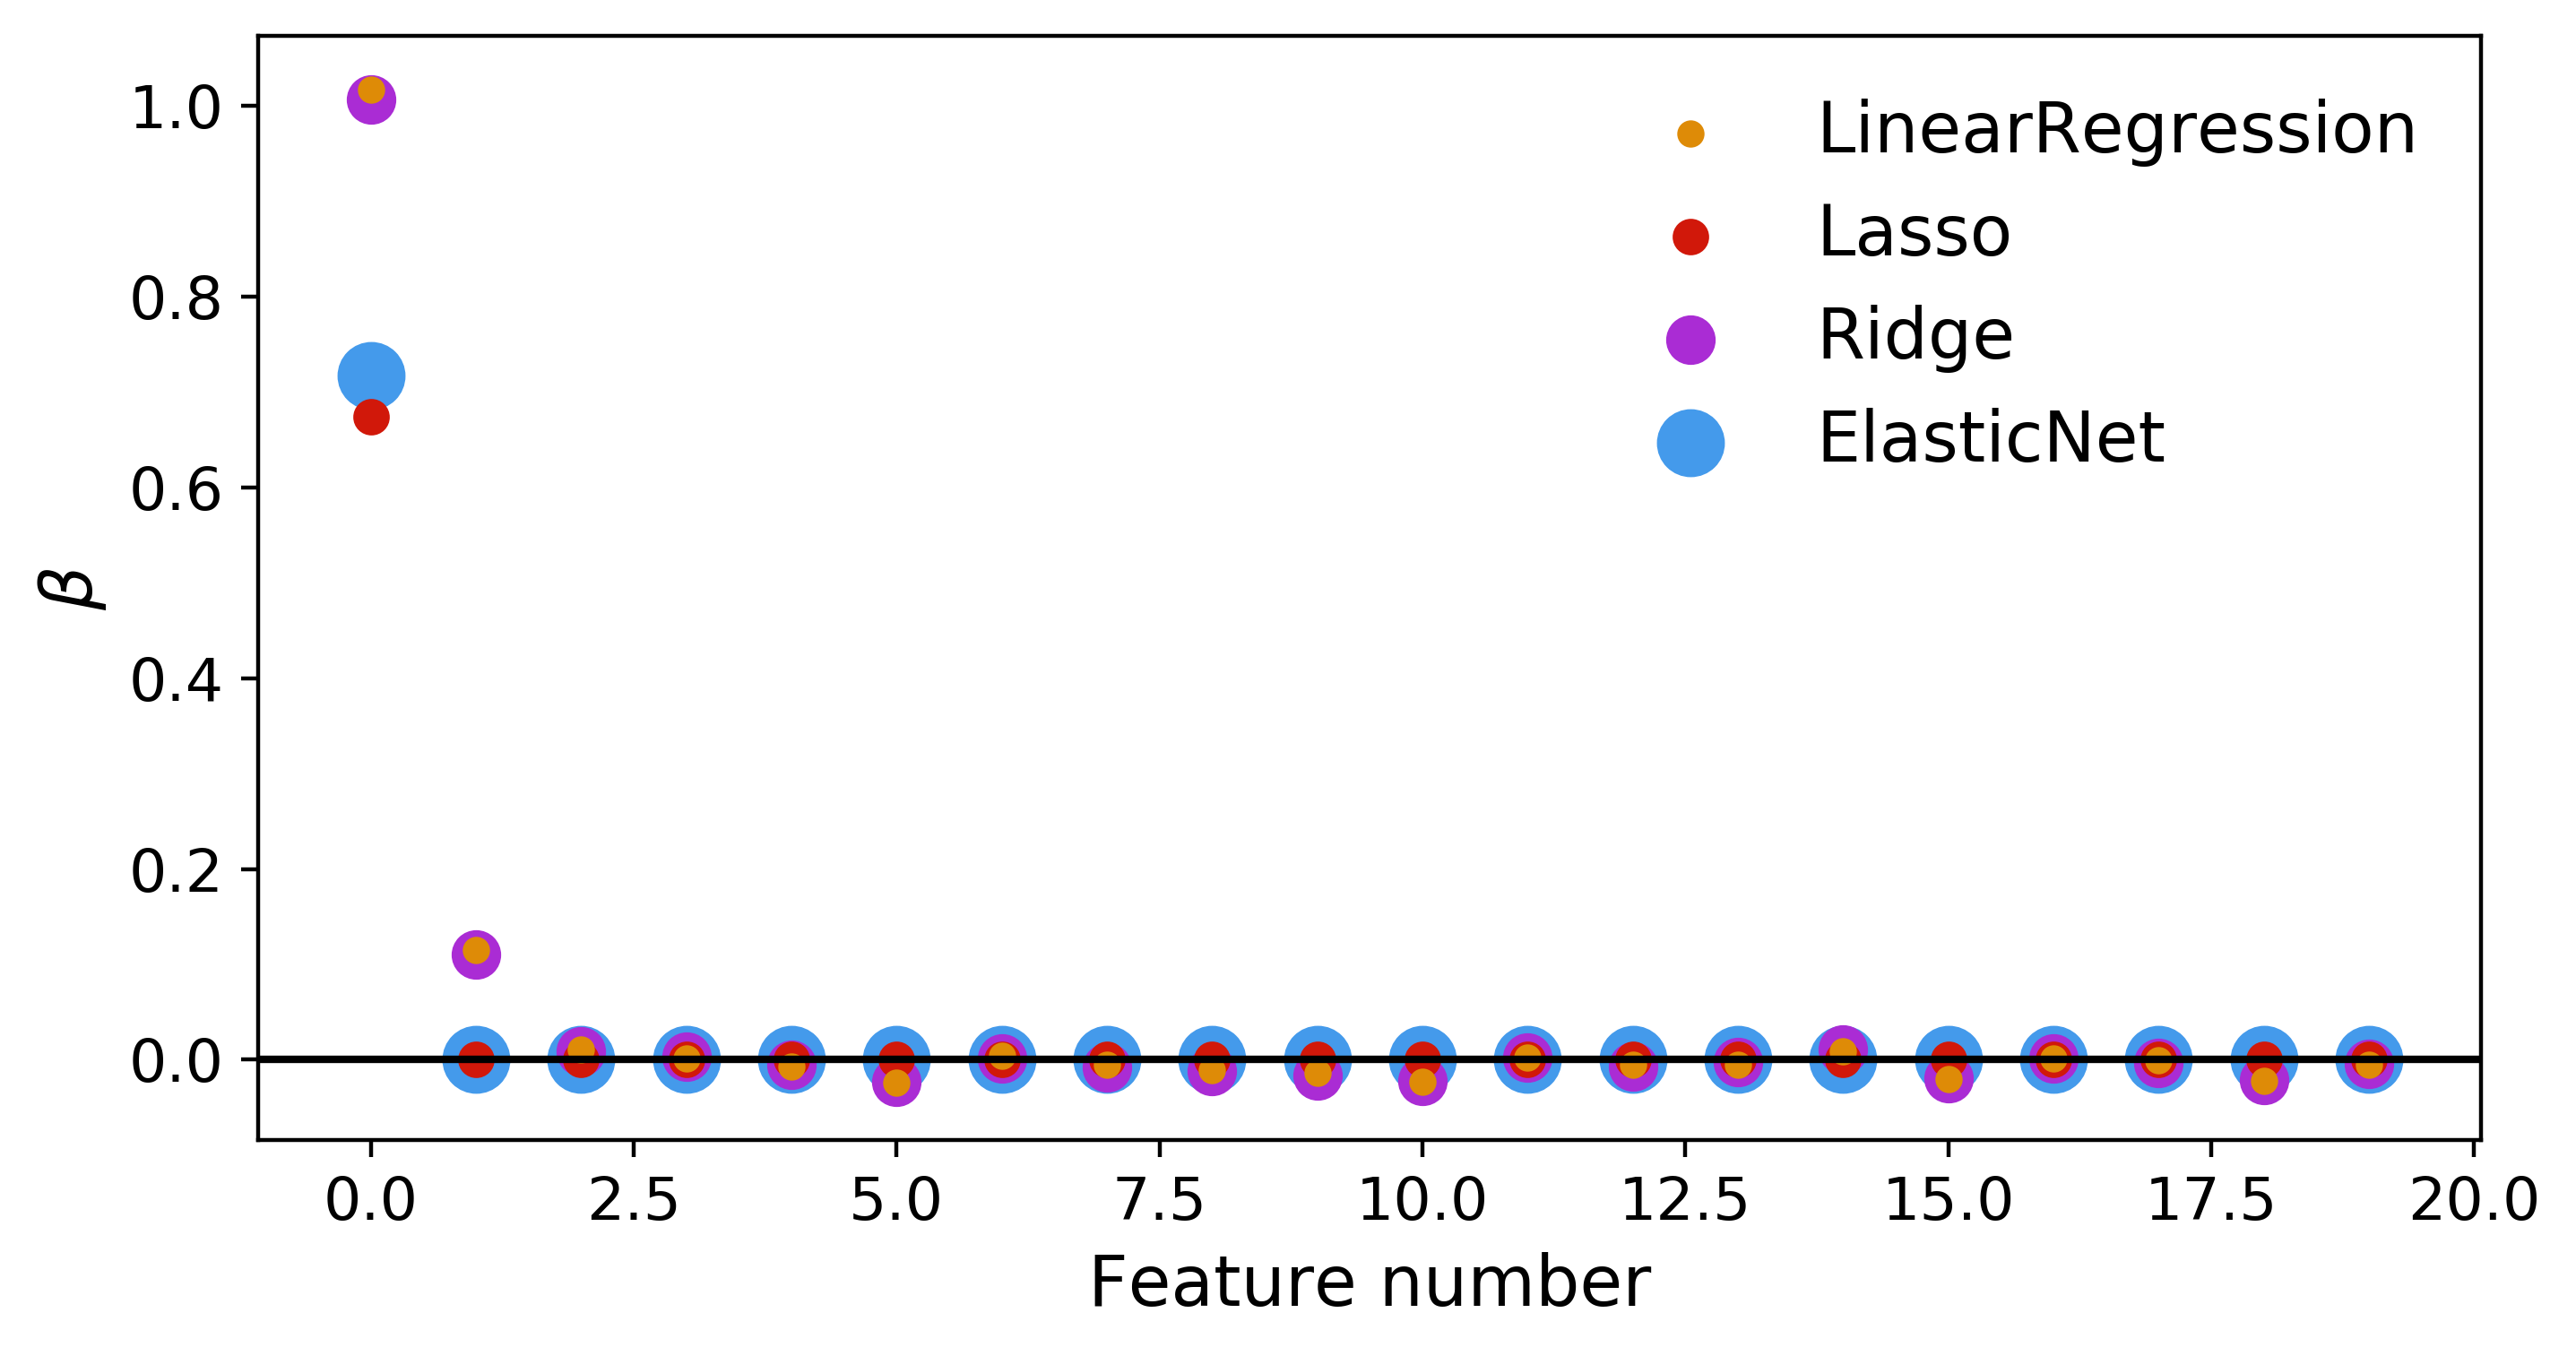

In [9]:
size=20
for name, betas in beta_dict.items():
    plt.scatter(np.arange(betas.shape[0]), betas, label=name, s=size, zorder=-size)
    size *= 2
plt.axhline(0, c="k"), plt.ylabel(r"$\beta$"), plt.xlabel("Feature number")
plt.legend();

!!!main img-small

We can see how effectively methods like Lasso regression pull down the importance of features that aren't significant and try and stop overfitting, leading to a more generalised model at the end. When training these models, the $\lambda$ parameter would need to be tuned to try and make sure we are not losing information we want. For example, in the above plot, we might have too much penalty in the ElasticNet and Lasso models (as they have a 0 value for the second feature, instead of the 0.1), whilst the Ridge regression - even though it recovers that second feature at the right value - fails to constrain all the other superflous features!

# Regularization on correlated data

When our input features are very highly correlated with each other, we can start to run into issues. Whether its perfect correlation (accidentally input temperature in both Farenheit and Celcius) or natural correlations (difficulty of getting up in the morning vs temperature out of the bed), these things can be an issue. So, in normal fashion, lets make us some issues.

In [10]:
from scipy.stats import multivariate_normal as mn
n = 50
es = 0.1
x0 = np.linspace(0, 10, n)

# Now some highly correlated variables!
x1 = 0.5 * x0 + norm.rvs(scale=0.01, size=n)
x2 = 0.5 * x1 + norm.rvs(scale=5, size=n)
xs = np.vstack((x0, x1, x2)).T

ys = x0 + es * norm.rvs(size=n)

Let's check the variance inflation factor. If this is above ten is generally means high correlation.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for index in range(xs.shape[1]):
    print(index, variance_inflation_factor(xs, index))

0 74563.33713200882
1 74559.06668872922
2 1.0190891029253206


Thats a lot of correlation. We shall proceed with the normal modelling fitting, which you can see below. Same thing as normal, except now instead of just plotting the predictions in our one-dimensional view, we also plot the distribution of $\beta_0$ values (just so we can see how important each model rated the first feature).

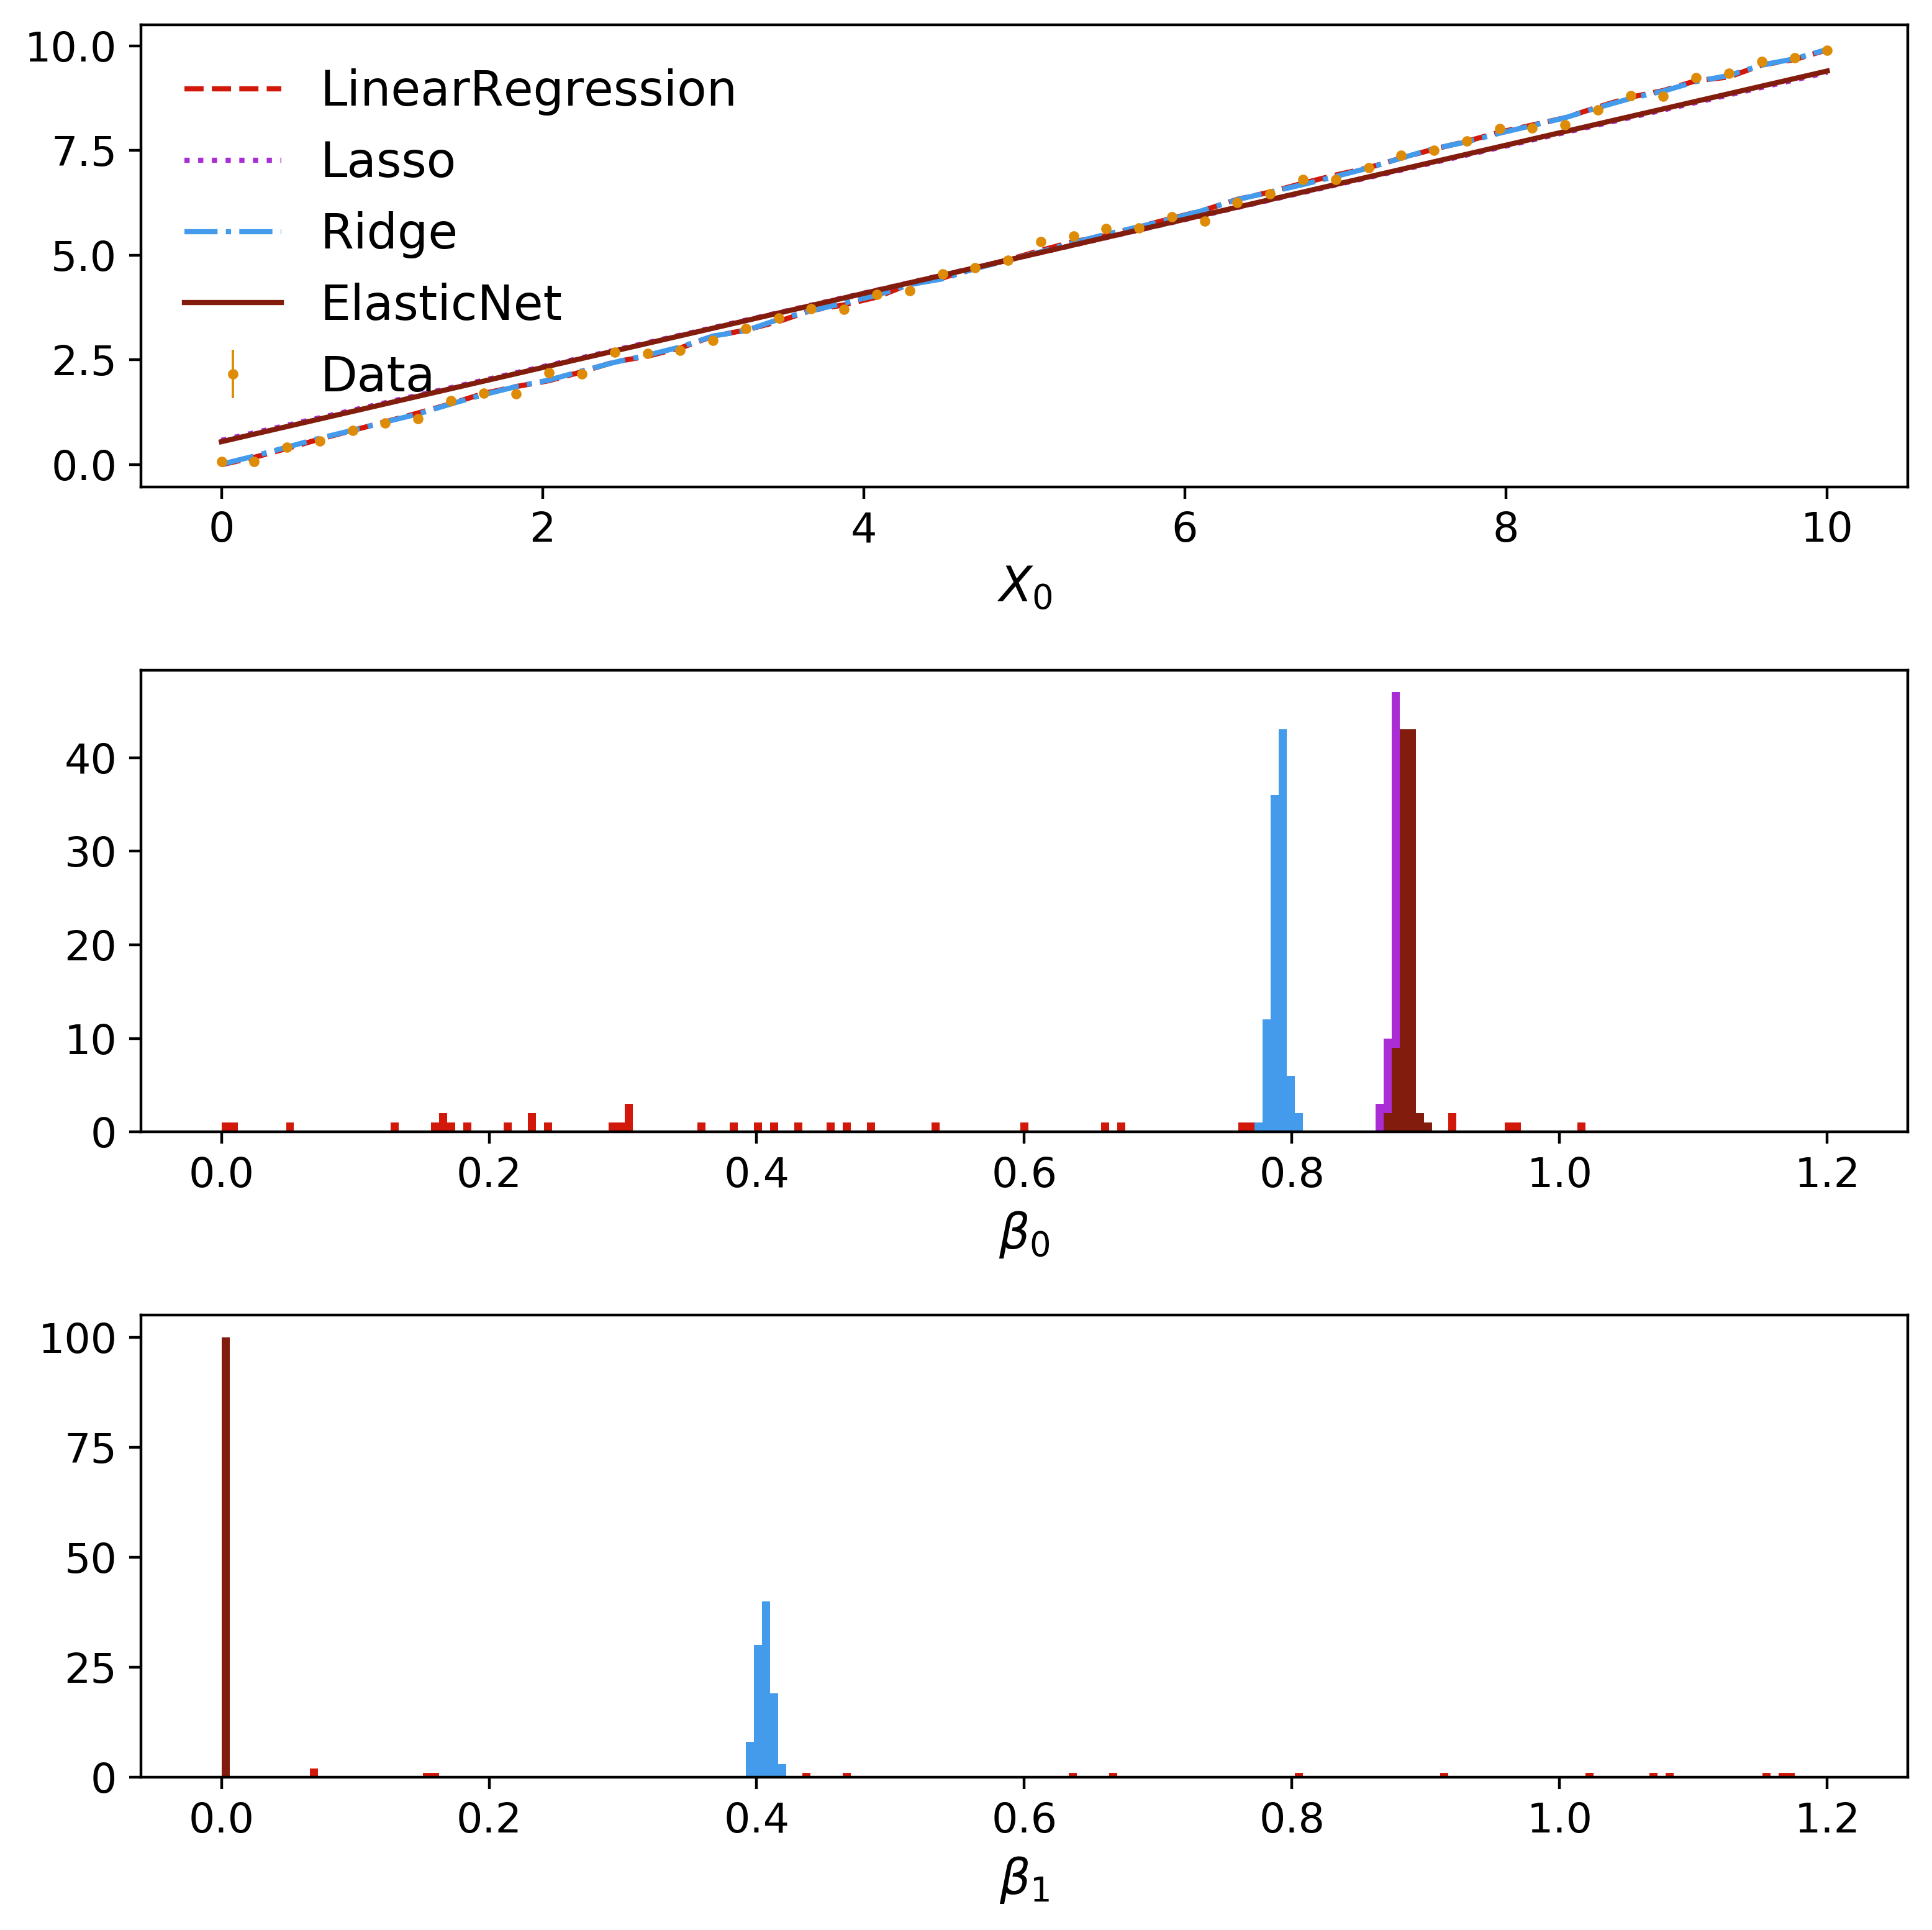

In [27]:
def do_monte_carlo_fit(xs, ys, es, model, samps=100):
    """ A small function that perturbs the data and refits a model.
    Returns the mean prediction and also all the beta (coefficient) values."""
    predictions = []
    betas = []
    for i in range(samps):
        np.random.seed(i)
        m.fit(xs, ys + es * norm.rvs(size=ys.shape))
        betas.append(m.coef_)
        predictions.append(m.predict(xs))
    return np.mean(predictions, axis=0), np.array(betas)

# Set up the figure and bins for the beta histogram
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))
axes[0].errorbar(xs[:, 0], ys, yerr=0.1, fmt="o", lw=0.7, label="Data");
bins = np.linspace(0, 1.2, 200)

for m in [LinearRegression(), Lasso(), Ridge(), ElasticNet()]:
    # We get the mean prediction and all beta values
    mean, betas = do_monte_carlo_fit(xs, ys, es, m)

    # And plot it all out
    line, *_ = axes[0].plot(xs[:, 0], mean, label=m.__class__.__name__)
    axes[1].hist(betas[:, 0], color=line.get_color(), bins=bins)
    axes[2].hist(betas[:, 1], color=line.get_color(), bins=bins)

axes[0].legend(loc=2)
axes[0].set_xlabel(r"$X_0$")
axes[1].set_xlabel(r"$\beta_0$")
axes[2].set_xlabel(r"$\beta_1$")
plt.tight_layout();

The takeaway here is that, **even though the predictions look to be pretty similar**, the methods which include regularization have much more consistent values for their $\beta$ values. To put this another way, the stock standard LinearRegression model, if we perturb our data, could have wildly changing coefficients. Because our input features are highly correlated, sometimes $\beta_0$ might be low, but it will be compensated for by $\beta_1$ being higher. This is why the top plot looks fine, but the red distribution in the histograms is spread out. Regularization will put a stop to that, as it will effectively select whatever feature fits the data with the lowest possible $\beta$ values, allowing (in this case), for a far better localisation of $\beta$. 

This can become important in various machine learning pipelines. In some data sets, we have a huge number of potential features, and often we select a few of these features as ones of interest, and create models of those. These features can be extracted often by simple methods like checking the correlations with the dependent variable, but sometimes simple linear models are fit, and any with significant $\beta$ values are selected to continue down the pipeline. A correlation approach would pass all our incredibly correlated features down the line. Normal linear regression would constantly change what it is deciding to send down the line. But a nicely regularized linear regression will pass on features correlated with the dependent variable, whilst removing independent variables which are very highly correlated with each other.

Caveat: only when it all works nicely.

Caveat: reality rarely works nicely.

# Summary

To recap:

1. Lasso regression, adds a penalty (L1) thats the sum of the absolute value of the coefficients.
2. Ridge regression, adds a penalty (L2) thats the sum of the squares of the coefficients.
3. ElasticNet adds both penalties.
4. When you have lots of features but only some are important, you can tune your regularization so that your model only uses useful features.
5. When you have highly correlated features, regularization can be used to ensure more consistent model behaviour and feature selection.

Regularization on other models is, unsurprisingly, even more complicated.